# Cross-validation (CV, 交叉驗證)

<font size = 5>目的 : 防止模型過於複雜而引起過度擬合 (overfitting)</font>

交叉驗證主要分為以下幾類
1.  K-folder CV:

    將訓練集分成 k 個子集，每個子集都做一次測試集，其他子集做訓練集。最後將 k 次的結果(AUC或Acc)平均，則得到 CV score，以此當作結果。
    
2.  KK-folder CV

    和 K-folder CV 相似，但是此把 k 個子集平均分成 2 個子集(s0,s1)。用 s0 當訓練 s1 當測試; s1 當訓練 s0 當測試。可以想像成把資料分成 k 份後再做一次 k-folder CV。
    
3.  least-one-out CV (LOOCV)

    依照要本數去決定 k-folder 的 k 值。例如假設有 n 個樣本，則使用 k-folder CV，這裡 k = n 。

    優點 :
    1.  每一次 fit model 時，每個樣本幾乎都被使用到，所以 model 會最接近母體樣本的分佈。
    2.  實驗中沒有隨機因素會影響結果

    缺點 :
    1.  相較前兩者，計算成本較高。
    

10 fold 圖例:

<img src="https://i.imgur.com/tLWEE80.png" width="50%" height="50%">

CV 除了預防 overfitting ，也有其他用途。例如：
*   在 Logistic ridge regression 要用 training set fit model 時，必須去決定 $\lambda$ (tuning parameter) ，此時可以利用 CV 的方式去尋找。(KNN 的K 也同樣)
*   完整資料 (沒有分training set, test set) 中，利用 CV 去分 training 跟 test 。
*   ...


## python
*   python 1 : 單個參數並且不執行多次的CV
*   python 2 : 多個參數並且執行多次的CV

### python 1
*   [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
    *   n_neighbors : k 值
    *   metric  : 距離計算方式(可放入自己寫的函數f(x,y)). eg: metric = f
    *   p : metric = minkowski 的次方項
*   [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) (n_splits = k, shuffle = True/False , random_state = int )
    *   n_splits : 幾次cv, default=5
    *   shuffle : 是否重新洗牌 (index改變) ? 若為 false , 則不用放 random_state , 因為 index 不會改變, default=False
    *   random_state : 種子碼，若 shuffle = True , 則要填寫。 default=None
*   [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) (estimator, X, y=None, * , groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    *   estimator : model
    *   cv : cv值，可以放入 kfold(n_splits = k, shuffle = True/False , random_state = int )
    *   scoring : 評分標準(例如: 'accuracy' 或 'roc_auc')，參考下圖。


[圖片來源 : Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

<img src="https://img-blog.csdn.net/20180924201007560?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzMyNTkwNjMx/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70" width="50%" height="50%">

#### e.g. 1
固定 k 值。

In [12]:
from sklearn.model_selection import KFold,cross_val_score  
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import random

In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [151]:

knn = KNeighborsClassifier(n_neighbors=9) #KNN 找9個鄰近值
kfold = KFold(n_splits=10, shuffle=True, random_state=45)
scores = cross_val_score(knn,X,y,cv=kfold,scoring='accuracy')  #5 fold, cv score 用 acc 去計算
print(scores)
print(scores.mean())

[1.         1.         1.         1.         0.86666667 0.93333333
 1.         0.93333333 0.93333333 1.        ]
0.9666666666666666


#### e.g. 2


In [59]:
from sklearn.model_selection import KFold,cross_val_score  
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [60]:
k_range = [3+2*i for i in range(15)]
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    kfold = KFold(n_splits=10, shuffle=True, random_state=44)
    scores = cross_val_score(knn,X,y,cv=kfold,scoring='accuracy')
    k_scores.append(scores.mean())

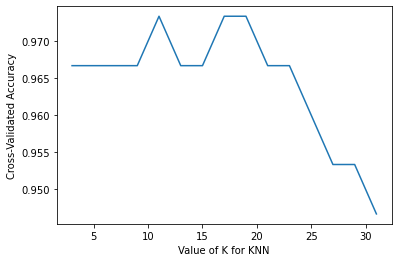

In [61]:
plt.plot(k_range,k_scores) # 畫不同 k 值，cv score 的大小
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### python 2
*   [RepeatedStratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html) (*, n_splits=5, n_repeats=10, random_state=None)
    *   n_splits : cv 次數
    *   n_repeats : 做幾次 k-fold
    *   random_state : 種子碼

$\\$
*   [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
    *   estimator : model
    *   param_grid : 放入 dict 或 dictionaries，比較多個參數(例如 k 不同的 knn)的 CV 時，用於決定參數值。
    *   scoring : 評分，同上
    *   cv : cv
    *   n_jobs : Controls the number of jobs that get dispatched during parallel execution.

$\\$
*   GridSearchCV.Attributes
    *   cv_results_ : 以字典表示詳細結果
    *   best_estimator_ : 最佳估計模型 (輸出是 estimator )
    *   best_score_ : 最佳 mean(CV score)
    *   best_params_ : 最佳參數
    *   best_index_ : 最佳參數位置
    *   scorer_ : Scorer function used on the held out data to choose the best parameters for the model.
    *   n_splits_ : cv * rep 的值
    *   refit_time_ : 重新 fit 的時間
    *   multimetric_ : Whether or not the scorers compute several metrics.
    *   classes_ : Y 的種類
    *   n_features_in_ : fit時的特徵的數量
    *   feature_names_in_


In [51]:
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn import datasets
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr #相關係數

In [52]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [25]:
#def mydist(X, y):
#        return 1 - spearmanr(X, y)[0]

In [53]:
k_range = [3+2*i for i in range(15)]

#knn = KNeighborsClassifier(metric = mydist)
knn = KNeighborsClassifier()
kfold = RepeatedStratifiedKFold(n_splits = 5, random_state = 0, n_repeats = 10) 
param_grid = [{'n_neighbors': k_range}]
gs = GridSearchCV(estimator = knn, 
                    param_grid = param_grid, 
                    scoring = 'accuracy', 
                    cv = kfold, 
                    n_jobs = -1)


In [55]:
gs.fit(X,y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31]}],
             scoring='accuracy')

In [62]:
gs.cv_results_

{'mean_fit_time': array([0.00096012, 0.00084007, 0.00062023, 0.00062012, 0.00068014,
        0.00068037, 0.00074016, 0.00122029, 0.00068   , 0.00066962,
        0.00063413, 0.00046018, 0.00054018, 0.00056015, 0.00050013]),
 'std_fit_time': array([0.00063133, 0.00041766, 0.00052514, 0.00048548, 0.00046657,
        0.00046673, 0.00059377, 0.00428712, 0.00058107, 0.00074529,
        0.00048133, 0.00049859, 0.00049857, 0.00049652, 0.00050014]),
 'mean_score_time': array([0.00322083, 0.00262062, 0.0026806 , 0.00260045, 0.00242041,
        0.00256051, 0.00258045, 0.00260059, 0.00258065, 0.00254068,
        0.00226538, 0.00174045, 0.00160029, 0.00162047, 0.00182423]),
 'std_score_time': array([0.00140429, 0.00052549, 0.00070586, 0.00077487, 0.0005326 ,
        0.00072576, 0.00089676, 0.00066322, 0.00053238, 0.00093087,
        0.00081524, 0.00055936, 0.00052941, 0.00056195, 0.00068877]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],
        

In [58]:
print(f"最佳準確率: {gs.best_score_}, 最佳k值 : {gs.best_params_}")
print()
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"平均準確率: {mean}, 標準差: {stdev}, k值: {param}")


最佳準確率: 0.9720000000000002, 最佳k值 : {'n_neighbors': 13}

平均準確率: 0.9613333333333334, 標準差: 0.03290390047800817, k值: {'n_neighbors': 3}
平均準確率: 0.9666666666666669, 標準差: 0.029814239699997188, k值: {'n_neighbors': 5}
平均準確率: 0.9660000000000002, 標準差: 0.032991581417756315, k值: {'n_neighbors': 7}
平均準確率: 0.9653333333333335, 標準差: 0.033306655991458115, k值: {'n_neighbors': 9}
平均準確率: 0.9713333333333335, 標準差: 0.030557777696975565, k值: {'n_neighbors': 11}
平均準確率: 0.9720000000000002, 標準差: 0.03222145592958552, k值: {'n_neighbors': 13}
平均準確率: 0.9700000000000002, 標準差: 0.03214550253664318, k值: {'n_neighbors': 15}
平均準確率: 0.97, 標準差: 0.03282952600598701, k值: {'n_neighbors': 17}
平均準確率: 0.9693333333333334, 標準差: 0.033888706739036885, k值: {'n_neighbors': 19}
平均準確率: 0.9580000000000001, 標準差: 0.035156791662493886, k值: {'n_neighbors': 21}
平均準確率: 0.9553333333333334, 標準差: 0.03748184745832159, k值: {'n_neighbors': 23}
平均準確率: 0.9506666666666668, 標準差: 0.03785351884420903, k值: {'n_neighbors': 25}
平均準確率: 0.9520000000000002, 標準差: 0

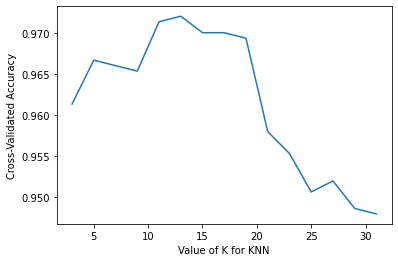

In [57]:
plt.plot(k_range,means) # 畫不同 k 值，cv score 的大小
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

參考資料
1.  [[Day29]機器學習：交叉驗證！](https://ithelp.ithome.com.tw/articles/10197461)
2.  [机器学习中的交叉验证（cross-validation）](https://blog.csdn.net/lhx878619717/article/details/49079785)
3.  [sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
4.  [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
5.  [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
6.  [Day 05：神經網路的效能調校(續)](https://ithelp.ithome.com.tw/articles/10234203) #GridSearchCV 參考
